# DataDivas


# Data Preparation

In [ ]:
#Mount Google Drive to notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Read forward deliveries data to dataframe
fwd_df = pd.read_csv("/content/drive/My Drive/DataDivas Shopee Case Competition/delivery_data_raw.csv",parse_dates=['report_date'],index_col=['report_date'])
fwd_df.head()

,region,area_cluster,station_id,total_delivery_vol,delivery_buyer
report_date,,,,,
2024-09-01,NCR,NCR1 Metro Manila West,9,10590,8366
2024-09-01,NCR,NCR1 Metro Manila West,11,6517,5354
2024-09-01,NCR,NCR1 Metro Manila West,13,9747,7872
2024-09-01,NCR,NCR1 Metro Manila West,434,10241,8767
2024-09-01,NCR,NCR1 Metro Manila West,1707,11866,9886


In [ ]:
rr_df = pd.read_csv("/content/drive/My Drive/DataDivas Shopee Case Competition/rr_data_raw.csv",parse_dates=['report_date'],index_col=['report_date'])
rr_df.head()

,region,area_cluster,station_id,rr_pu_vol,rr_users
report_date,,,,,
2024-09-01,NCR,NCR1 Metro Manila West,9,37,34
2024-09-01,NCR,NCR1 Metro Manila West,11,40,37
2024-09-01,NCR,NCR1 Metro Manila West,13,52,45
2024-09-01,NCR,NCR1 Metro Manila West,434,64,54
2024-09-01,NCR,NCR1 Metro Manila West,1707,48,39


# Initial Data Exploration

In [ ]:
rr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3026 entries, 2024-09-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        3026 non-null   object
 1   area_cluster  3026 non-null   object
 2   station_id    3026 non-null   int64 
 3   rr_pu_vol     3026 non-null   int64 
 4   rr_users      3026 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 141.8+ KB


In [ ]:
fwd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3027 entries, 2024-09-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   region              3027 non-null   object
 1   area_cluster        3027 non-null   object
 2   station_id          3027 non-null   int64 
 3   total_delivery_vol  3027 non-null   int64 
 4   delivery_buyer      3027 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 141.9+ KB


In [ ]:
# Merging datasets with left join
df = pd.merge(fwd_df, rr_df, on=['report_date', 'region', 'area_cluster', 'station_id'], how='left')
df['month'] = df.index.month

# Filling null values with 0
df['rr_pu_vol'] = df['rr_pu_vol'].fillna(0)
df['rr_users'] = df['rr_users'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3027 entries, 2024-09-01 to 2024-12-31
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   region              3027 non-null   object 
 1   area_cluster        3027 non-null   object 
 2   station_id          3027 non-null   int64  
 3   total_delivery_vol  3027 non-null   int64  
 4   delivery_buyer      3027 non-null   int64  
 5   rr_pu_vol           3027 non-null   float64
 6   rr_users            3027 non-null   float64
 7   month               3027 non-null   int32  
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 201.0+ KB


Text(0.5, 1.0, 'Correlation Heatmap')

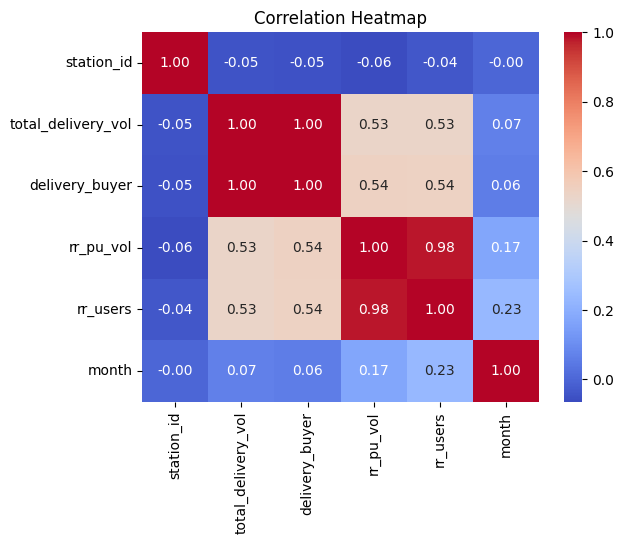

In [ ]:
# View correlation of all columns with each other
df_heat = df.copy()
df_heat = df_heat.drop(columns=['region', 'area_cluster'])
sns.heatmap(df_heat.corr(),cmap='coolwarm',annot=True, fmt=".2f")
plt.title('Correlation Heatmap')

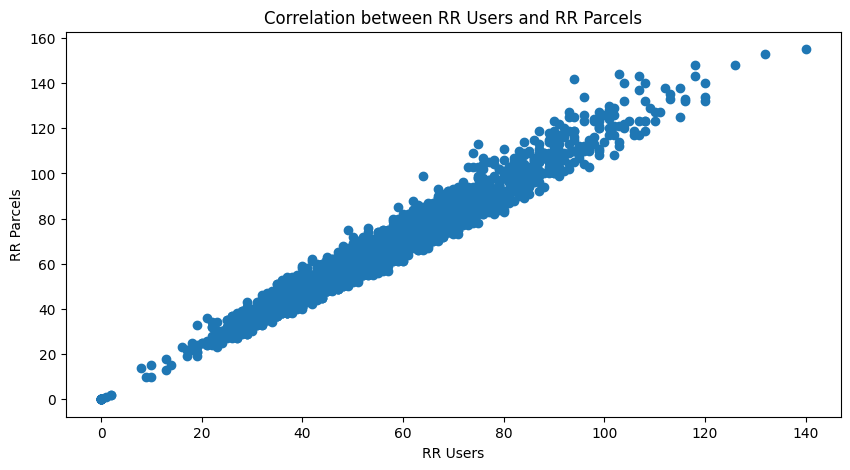

In [ ]:
# Check for correlation between return/refund senders and return/refunded parcels
x = df['rr_users']
y = df['rr_pu_vol']

plt.figure(figsize=(10,5))
plt.scatter(x,y)

plt.xlabel('RR Users')
plt.ylabel('RR Parcels')
plt.title('Correlation between RR Users and RR Parcels')
plt.show()
# High positive correlation

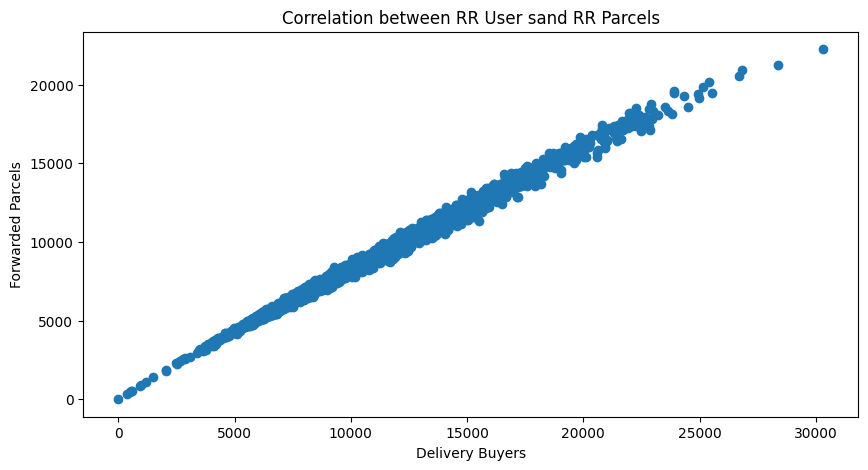

In [ ]:
# Check for correlation between buyers and forwarded parcels
x = df['total_delivery_vol']
y = df['delivery_buyer']

plt.figure(figsize=(10,5))
plt.scatter(x,y)

plt.xlabel('Delivery Buyers')
plt.ylabel('Forwarded Parcels')
plt.title('Correlation between RR User sand RR Parcels')
plt.show()
# High positive correlation

Text(0.5, 1.0, 'Correlation between Delivery Buyers and RR Users')

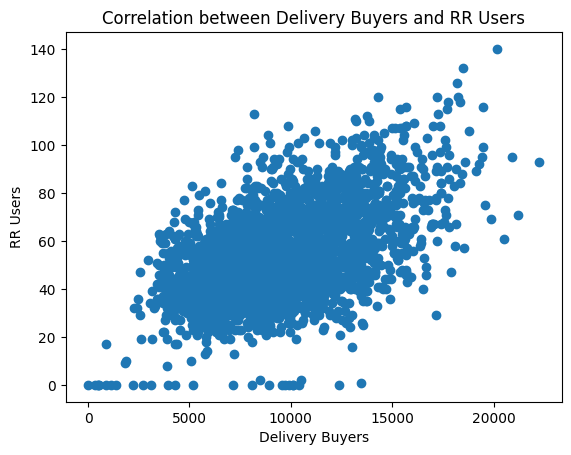

In [ ]:
x = df['delivery_buyer']
y = df['rr_users']

plt.scatter(x,y)

plt.xlabel('Delivery Buyers')
plt.ylabel('RR Users')

plt.title('Correlation between Delivery Buyers and RR Users')
# Low positive correlation between delivery buyers and return/refund users

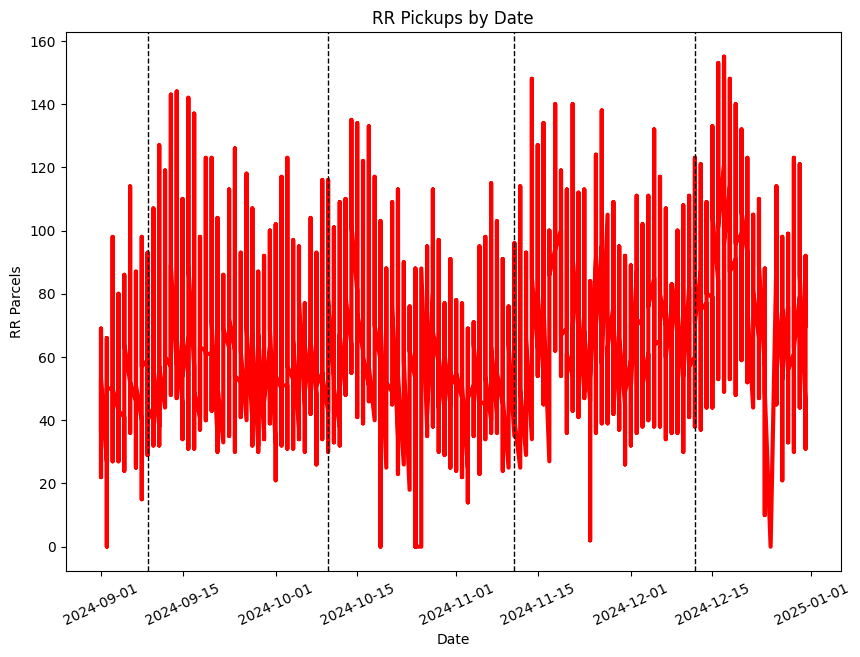

In [ ]:
# Plotting RR Pickups
x = df.index
y = df['rr_pu_vol']

plt.figure(figsize=(10,7))
plt.plot(x,y,'-r',linewidth=3)
plt.xticks(rotation = 25)

# 9.9, 10.10, 11.11, 12.12 sales are plotted
plt.axvline(pd.to_datetime('2024-09-09'), color='black', ls='--', linewidth=1)
plt.axvline(pd.to_datetime('2024-10-10'), color='black', ls='--', linewidth=1)
plt.axvline(pd.to_datetime('2024-11-11'), color='black', ls='--', linewidth=1)
plt.axvline(pd.to_datetime('2024-12-12'), color='black', ls='--', linewidth=1)

plt.xlabel('Date')
plt.ylabel('RR Parcels')
plt.title('RR Pickups by Date')
plt.show()
# Seasonal trend

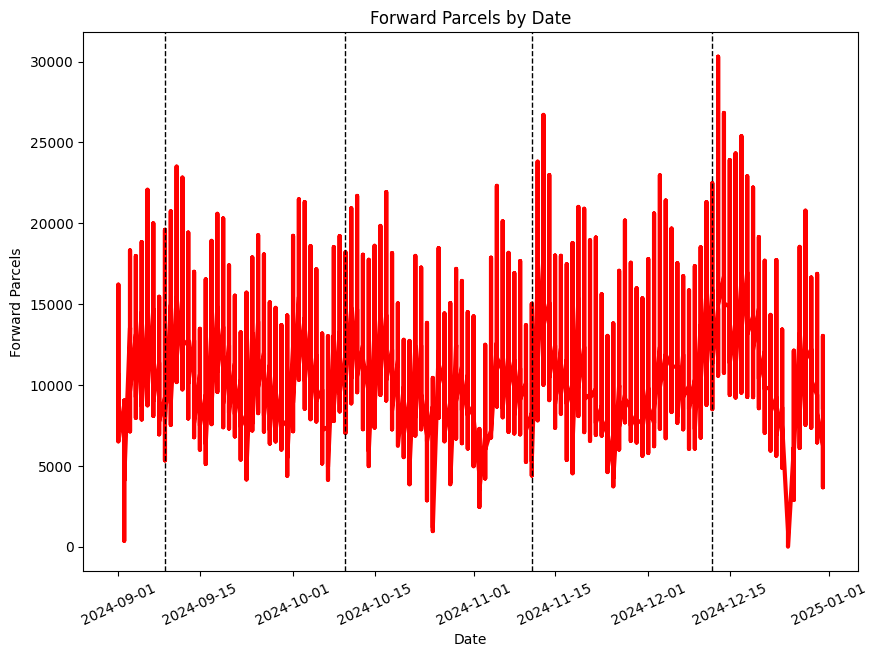

In [ ]:
# Plotting forward parcels
x = df.index
y = df['total_delivery_vol']

plt.figure(figsize=(10,7))
plt.plot(x,y,'-r',linewidth=3)
plt.xticks(rotation = 25)

# 9.9, 10.10, 11.11, 12.12 sales are plotted
plt.axvline(pd.to_datetime('2024-09-09'), color='black', ls='--', linewidth=1)
plt.axvline(pd.to_datetime('2024-10-10'), color='black', ls='--', linewidth=1)
plt.axvline(pd.to_datetime('2024-11-11'), color='black', ls='--', linewidth=1)
plt.axvline(pd.to_datetime('2024-12-12'), color='black', ls='--', linewidth=1)

plt.title('Forward Parcels by Date')
plt.xlabel('Date')
plt.ylabel('Forward Parcels')
plt.show()
# Seasonal trend

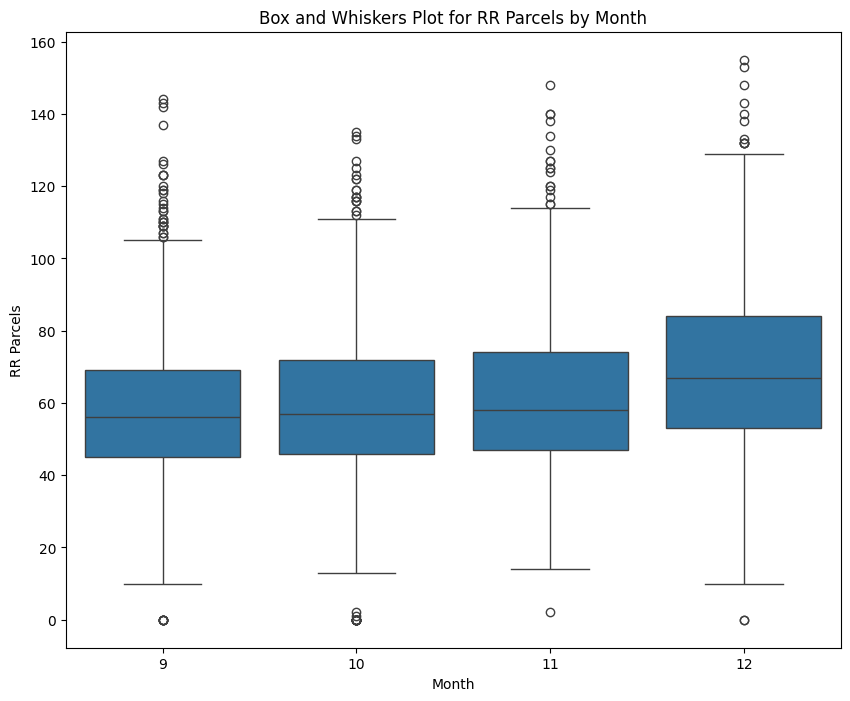

In [ ]:
# Checking for outliers
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='rr_pu_vol')
plt.title('Box and Whiskers Plot for RR Parcels by Month')

plt.xlabel('Month')
plt.ylabel('RR Parcels')
plt.show()

# Proportions of Volume by Station ID

In order to predict how many parcels will be refunded or returned in the next 30 days for each hub, we wanted to see the general proportions that each station contributes to the overall total RR parcels per month. With this information, we can estimate how many RR parcels each hub will produce in January by simply multiplying each station's proportion to the forecasted total RR parcels of January.

In [ ]:
# Dividing dataframes by month
sep = df[df['month'] == 9]
oct = df[df['month'] == 10]
nov = df[df['month'] == 11]
dec = df[df['month'] == 12]

# Summing up RR Parcels by month
sep_total_rr = sep["rr_pu_vol"].sum()
oct_total_rr = oct["rr_pu_vol"].sum()
nov_total_rr = nov["rr_pu_vol"].sum()
dec_total_rr = dec["rr_pu_vol"].sum()

print(f'The total returns and refunds in the dataset is {df["rr_pu_vol"].sum()}')
print(f'The total returns and refunds of September is {sep_total_rr}')
print(f'The total returns and refunds of October is {oct_total_rr}')
print(f'The total returns and refunds of November is {nov_total_rr}')
print(f'The total returns and refunds of December is {dec_total_rr}')

The total returns and refunds in the dataset is 189560.0
The total returns and refunds of September is 44349.0
The total returns and refunds of October is 46358.0
The total returns and refunds of November is 46299.0
The total returns and refunds of December is 52554.0


In [ ]:
# Group data by station_id and month and summing up RR parcels by month
station_df = df.groupby(['station_id', 'month'])['rr_pu_vol'].sum().reset_index()

In [ ]:
# September Data by Station
sep_by_station = station_df[station_df['month'] == 9].copy()
sep_by_station['proportion_sep'] = (sep_by_station['rr_pu_vol']/sep_total_rr) # Multiply this column by 100 to see its value in percent
sep_by_station = sep_by_station.drop(columns=['month','rr_pu_vol'])
sep_by_station.head()

,station_id,proportion_sep
0,7,0.066540
4,9,0.032086
8,11,0.029110
12,13,0.037904
16,18,0.040655


In [ ]:
sep_by_station['proportion_sep'].sum() # check if all values add up to 100%

np.float64(1.0)

In [ ]:
# Creating new dataframes of RR parcels per station_id per month
oct_by_station = station_df[station_df['month'] == 10].copy()
oct_by_station['proportion_oct'] = (oct_by_station['rr_pu_vol']/oct_total_rr)
oct_by_station = oct_by_station.drop(columns=['month','rr_pu_vol'])

nov_by_station = station_df[station_df['month'] == 11].copy()
nov_by_station['proportion_nov'] = (nov_by_station['rr_pu_vol']/nov_total_rr)
nov_by_station = nov_by_station.drop(columns=['month','rr_pu_vol'])

dec_by_station = station_df[station_df['month'] == 12].copy()
dec_by_station['proportion_dec'] = (dec_by_station['rr_pu_vol']/dec_total_rr)
dec_by_station = dec_by_station.drop(columns=['month','rr_pu_vol'])

In [ ]:
# Merging the dataframes
from functools import reduce

dfs = [sep_by_station, oct_by_station, nov_by_station, dec_by_station]
proportions = reduce(lambda left, right: pd.merge(left, right, on='station_id', how='inner'), dfs)
proportions

,station_id,proportion_sep,proportion_oct,proportion_nov,proportion_dec
0,7,0.066540,0.064649,0.061146,0.053659
1,9,0.032086,0.031559,0.035487,0.044012
2,11,0.029110,0.030351,0.030001,0.030711
3,13,0.037904,0.036175,0.038554,0.038056
4,18,0.040655,0.043315,0.038035,0.034955
5,19,0.032853,0.036002,0.035465,0.036001
6,20,0.037836,0.040619,0.041275,0.042642
7,273,0.027396,0.030092,0.030519,0.032195
8,434,0.063474,0.055417,0.052895,0.047722
9,903,0.045773,0.045494,0.043457,0.042490


In [ ]:
# Getting the proportion for January using the mean proportion of the past 4 months
proportions['proportion_jan'] = np.mean(proportions[['proportion_sep', 'proportion_oct',
                                                     'proportion_nov', 'proportion_dec']], axis=1)
proportions

,station_id,proportion_sep,proportion_oct,proportion_nov,proportion_dec,proportion_jan
0,7,0.066540,0.064649,0.061146,0.053659,0.061499
1,9,0.032086,0.031559,0.035487,0.044012,0.035786
2,11,0.029110,0.030351,0.030001,0.030711,0.030043
3,13,0.037904,0.036175,0.038554,0.038056,0.037672
4,18,0.040655,0.043315,0.038035,0.034955,0.039240
5,19,0.032853,0.036002,0.035465,0.036001,0.035080
6,20,0.037836,0.040619,0.041275,0.042642,0.040593
7,273,0.027396,0.030092,0.030519,0.032195,0.030051
8,434,0.063474,0.055417,0.052895,0.047722,0.054877
9,903,0.045773,0.045494,0.043457,0.042490,0.044303


# XGBoost

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Disecting date into more features
def create_features(df):
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [ ]:
# Setting training and testing data
train = df.loc[df['month'] < 12].copy() # Sep-Nov
test = df.loc[df['month'] == 12].copy() # Dec

train.drop(columns=['region','area_cluster']) # Dropping string columns, will only rely on station_id
test.drop(columns=['region','area_cluster'])

,station_id,total_delivery_vol,delivery_buyer,rr_pu_vol,rr_users,month,dayofweek,dayofyear,dayofmonth,weekofyear
report_date,,,,,,,,,,
2024-12-01,9,9811,7821,59.0,53.0,12,6,336,1,48
2024-12-01,11,8138,6461,32.0,25.0,12,6,336,1,48
2024-12-01,13,11175,8727,52.0,46.0,12,6,336,1,48
2024-12-01,434,9476,7445,65.0,59.0,12,6,336,1,48
2024-12-01,1707,7071,5771,34.0,28.0,12,6,336,1,48
...,...,...,...,...,...,...,...,...,...,...
2024-12-31,20,7109,6171,61.0,54.0,12,1,366,31,1
2024-12-31,273,7473,6355,52.0,46.0,12,1,366,31,1
2024-12-31,1476,9434,7756,47.0,43.0,12,1,366,31,1


In [ ]:
test['rr_pu_vol'].sum() # Total number of rr parcels for December

np.float64(52554.0)

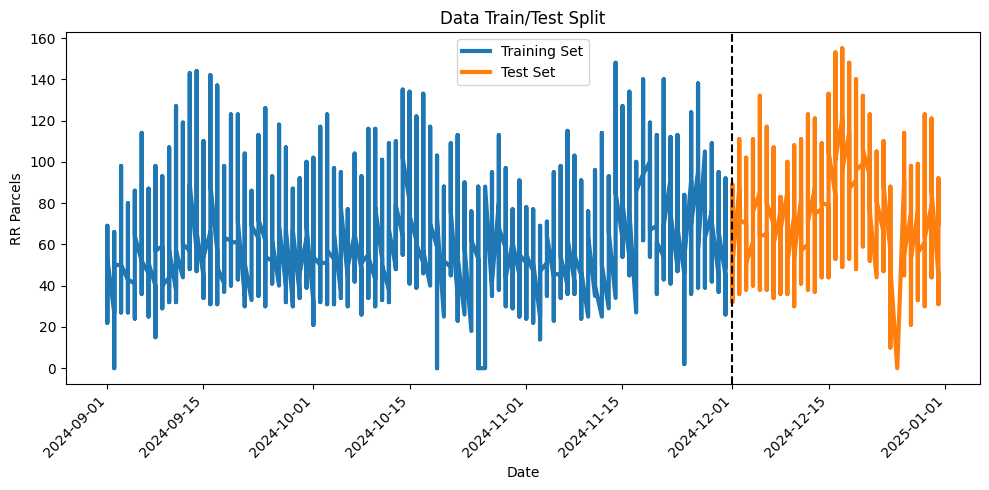

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot training data with date on x-axis and rr parcels on y-axis
ax.plot(train.index, train['rr_pu_vol'], label='Training Set', linewidth=3)

# Plot test data
ax.plot(test.index, test['rr_pu_vol'], label='Test Set', linewidth=3)

ax.axvline(pd.to_datetime('2024-12-01'), color='black', ls='--', linewidth=1.5) # December 1 is the start of our test data

ax.set_xlabel('Date')
ax.set_ylabel('rr_pu_vol')
ax.set_title('Data Train/Test Split')
ax.legend(['Training Set', 'Test Set'])

plt.xticks(rotation=45, ha='right')
plt.xlabel('Date')
plt.ylabel('RR Parcels')
plt.tight_layout()
plt.show()

In [ ]:
# Creating features for training and testing data
train = create_features(train)
test = create_features(test)

FEATURES = ['station_id','total_delivery_vol', 'delivery_buyer',
            'month', 'dayofweek', 'dayofyear', 'dayofmonth', 'weekofyear']
TARGET = 'rr_pu_vol' # Given all the columns mentioned above, predict the number of rr parcels

# NOTE: we decided to drop rr_users due to its obvious correlation to rr_pu_vol.
# We wanted to see the model's performance when rr_users data is not provided.

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
# Setting up XGBoost model
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

# Training model
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],verbose=100)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:17] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:62.94370	validation_1-rmse:72.54043
[100]	validation_0-rmse:27.92271	validation_1-rmse:34.75906
[200]	validation_0-rmse:17.88831	validation_1-rmse:22.27278
[300]	validation_0-rmse:15.34804	validation_1-rmse:18.71357
[400]	validation_0-rmse:14.36012	validation_1-rmse:17.58679
[500]	validation_0-rmse:13.57984	validation_1-rmse:16.89266
[600]	validation_0-rmse:13.00807	validation_1-rmse:16.50634
[700]	validation_0-rmse:12.66030	validation_1-rmse:16.31106
[800]	validation_0-rmse:12.34600	validation_1-rmse:16.18138
[900]	validation_0-rmse:12.12404	validation_1-rmse:16.09969
[999]	validation_0-rmse:11.95852	validation_1-rmse:16.06996


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

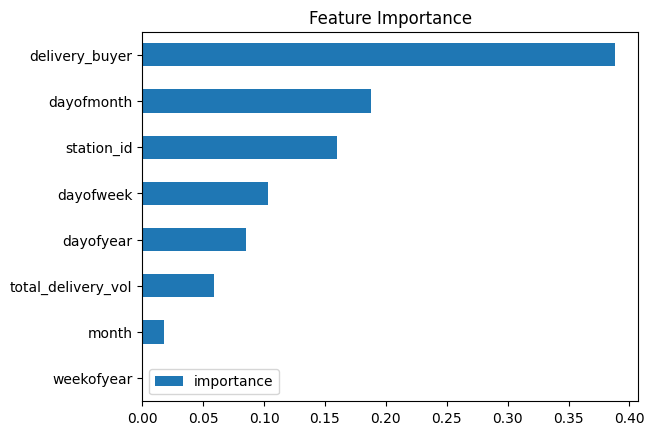

In [ ]:
# Checking feature importance
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# NOTE: Before we dropped rr_users, it was the most determinant column in the model for rr_pu_vol.

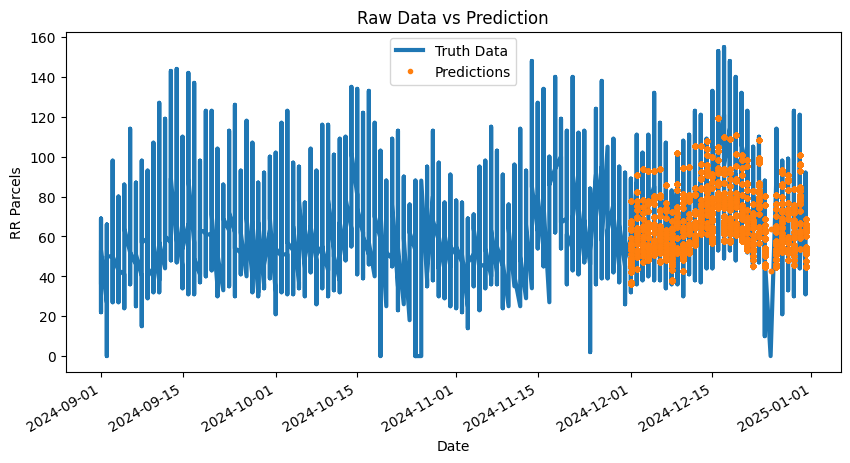

In [ ]:
# Plotting predicted data by XGBoost model against original data

test['prediction'] = reg.predict(X_test)
df2 = df.merge(test[['prediction']], how='left', left_index=True, right_index=True) # New df to avoid contamination of original data

ax = df2[['rr_pu_vol']].plot(figsize=(10, 5),linewidth=3)
df2['prediction'].plot(ax=ax, style='.')

plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data vs Prediction')

plt.xlabel('Date')
plt.ylabel('RR Parcels')
plt.show()

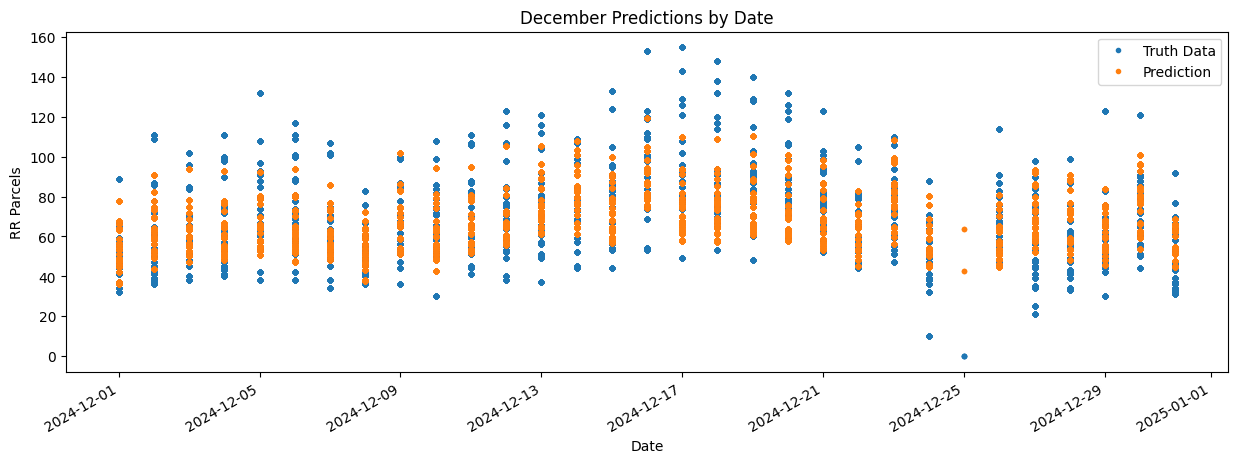

In [ ]:
# Zooming in on predicted data for December

ax = df2.loc[(df2.index >= '2024-12-01') & (df2.index <= '2024-12-31')]['rr_pu_vol'] \
    .plot(figsize=(15, 5), title='December Predictions by Date',style='.')
df2.loc[(df2.index >= '2024-12-01') & (df2.index <= '2024-12-31')]['prediction'] \
    .plot(style='.')

plt.legend(['Truth Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('RR Parcels')
plt.show()

In [ ]:
# Root Mean Square Error

score = np.sqrt(mean_squared_error(test['rr_pu_vol'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}') # The predicted data is 16 units away from truth data

RMSE Score on Test set: 16.07


In [ ]:
# Best Predicted Days
test['error'] = np.abs(test[TARGET] - test['prediction'])
test.groupby(test.index)['error'].mean().sort_values(ascending=True).head(5)

,error
report_date,
2024-12-08,5.402079
2024-12-01,7.079864
2024-12-10,8.135003
2024-12-03,8.581659
2024-12-14,8.872059


In [ ]:
# Worst Predicted Days
test['error'] = np.abs(test[TARGET] - test['prediction'])
test.groupby(test.index)['error'].mean().sort_values(ascending=False).head(5)

,error
report_date,
2024-12-25,53.204428
2024-12-17,23.694775
2024-12-18,18.559310
2024-12-20,17.019779
2024-12-27,16.795764


In [ ]:
# Cross Validation of Model
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=3, test_size=31*24, gap=24) # 3 splits for 3 months, test size for 24 hours in 31 days
df = df.sort_index()

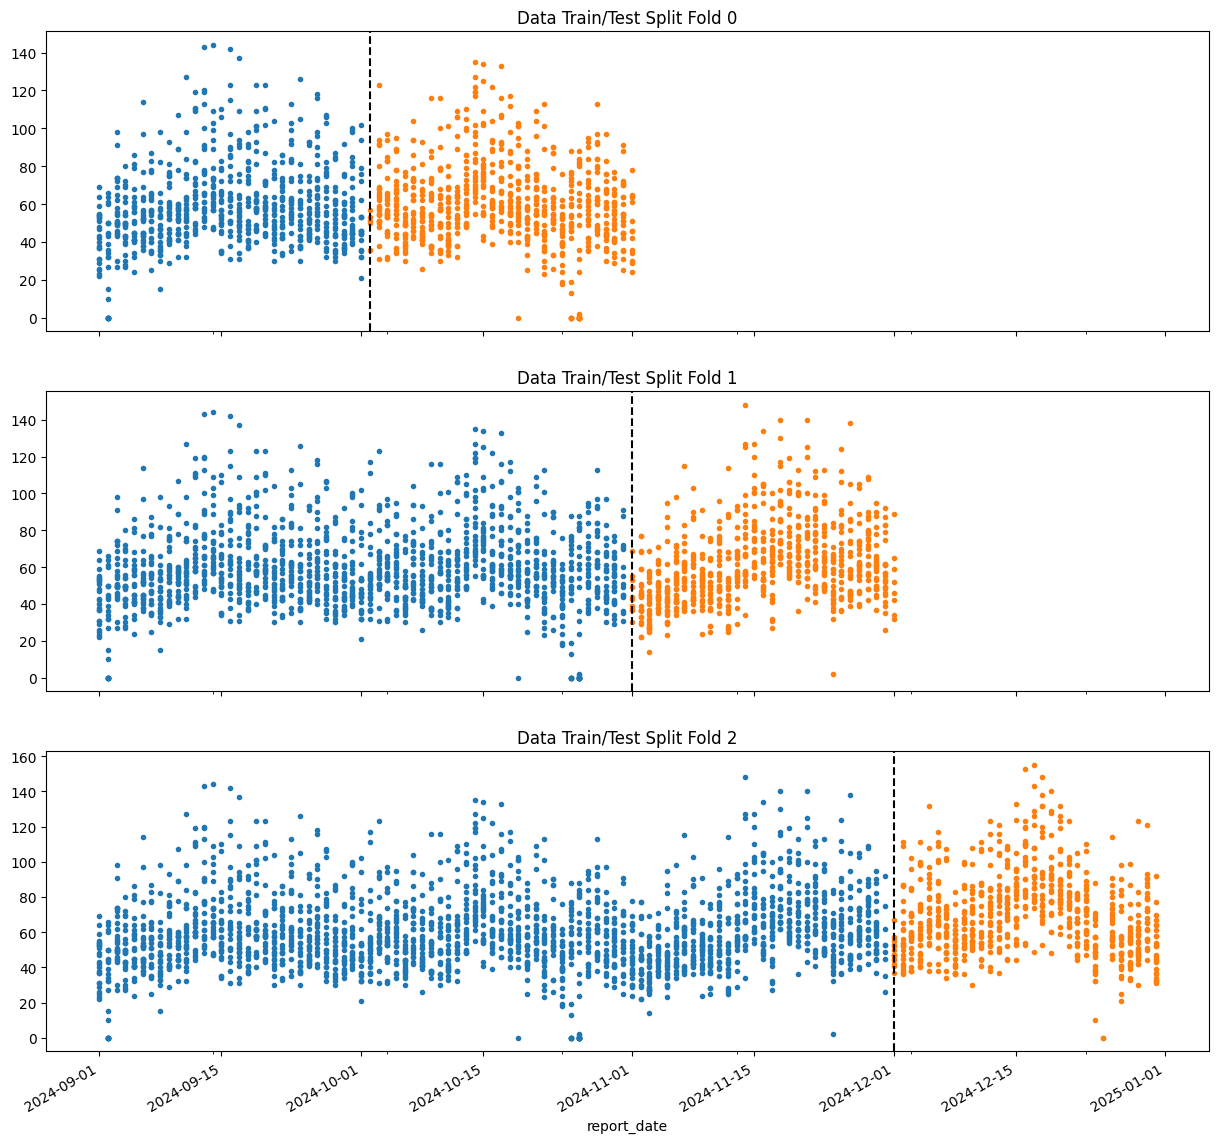

In [ ]:
# Folds for cross validation, begins new fold on first day of the month
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['rr_pu_vol'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}',
                          style='.')
    test['rr_pu_vol'].plot(ax=axs[fold],
                         label='Test Set',
                          style='.')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1

plt.show()

In [ ]:
# Lag Features
def add_lags(df):
    target_map = df['rr_pu_vol'].to_dict()
    df['lag'] = (df.index - pd.Timedelta('30 days')).map(target_map)
    return df

df = add_lags(df)

In [ ]:
# Retraining model with folds
tss = TimeSeriesSplit(n_splits=4, test_size=24*31, gap=24)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
  train = df.iloc[train_idx]
  test = df.iloc[val_idx]

  train = create_features(train)
  test = create_features(test)

  FEATURES = ['station_id','total_delivery_vol', 'delivery_buyer',
            'month', 'dayofweek', 'dayofyear', 'dayofmonth', 'weekofyear']
  TARGET = 'rr_pu_vol'

  X_train = train[FEATURES]
  y_train = train[TARGET]


  X_test = test[FEATURES]
  y_test = test[TARGET]
  reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                         n_estimators=1000,
                         early_stopping_rounds=50,
                         objective='reg:linear',
                         max_depth=3,
                         learning_rate=0.01)
  reg.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=100)

  y_pred = reg.predict(X_test)
  preds.append(y_pred)
  score = np.sqrt(mean_squared_error(y_test, y_pred))
  scores.append(score)

[0]	validation_0-rmse:43.48631	validation_1-rmse:62.94713
[100]	validation_0-rmse:18.90408	validation_1-rmse:38.42410
[200]	validation_0-rmse:9.96730	validation_1-rmse:29.80478
[300]	validation_0-rmse:5.95655	validation_1-rmse:26.51680
[400]	validation_0-rmse:3.89583	validation_1-rmse:25.35307


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:33] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[500]	validation_0-rmse:2.74691	validation_1-rmse:24.92320
[600]	validation_0-rmse:2.03047	validation_1-rmse:24.75840
[700]	validation_0-rmse:1.57559	validation_1-rmse:24.69714
[774]	validation_0-rmse:1.31193	validation_1-rmse:24.70173
[0]	validation_0-rmse:61.67984	validation_1-rmse:62.80442
[100]	validation_0-rmse:26.62408	validation_1-rmse:29.70812
[200]	validation_0-rmse:15.95656	validation_1-rmse:20.78888


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:34] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:12.90525	validation_1-rmse:18.47101
[400]	validation_0-rmse:11.81177	validation_1-rmse:17.79544
[500]	validation_0-rmse:11.17008	validation_1-rmse:17.55471
[600]	validation_0-rmse:10.73320	validation_1-rmse:17.42408
[700]	validation_0-rmse:10.38961	validation_1-rmse:17.34360
[800]	validation_0-rmse:10.04984	validation_1-rmse:17.28746
[900]	validation_0-rmse:9.78782	validation_1-rmse:17.27685
[999]	validation_0-rmse:9.56359	validation_1-rmse:17.23737
[0]	validation_0-rmse:62.33616	validation_1-rmse:64.45747
[100]	validation_0-rmse:27.58792	validation_1-rmse:30.87862
[200]	validation_0-rmse:17.56346	validation_1-rmse:21.10428
[300]	validation_0-rmse:15.00391	validation_1-rmse:18.74249


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:34] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[400]	validation_0-rmse:14.08344	validation_1-rmse:17.80791
[500]	validation_0-rmse:13.41470	validation_1-rmse:17.21462
[600]	validation_0-rmse:12.93642	validation_1-rmse:16.90125
[700]	validation_0-rmse:12.52703	validation_1-rmse:16.71131
[800]	validation_0-rmse:12.23654	validation_1-rmse:16.60046
[900]	validation_0-rmse:11.99284	validation_1-rmse:16.51752
[936]	validation_0-rmse:11.90411	validation_1-rmse:16.53404
[0]	validation_0-rmse:62.95901	validation_1-rmse:72.71079
[100]	validation_0-rmse:27.95249	validation_1-rmse:34.67095
[200]	validation_0-rmse:17.91444	validation_1-rmse:22.22023


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:35] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:15.38001	validation_1-rmse:18.56215
[400]	validation_0-rmse:14.37975	validation_1-rmse:17.43562
[500]	validation_0-rmse:13.61029	validation_1-rmse:16.88404
[600]	validation_0-rmse:13.07435	validation_1-rmse:16.48663
[700]	validation_0-rmse:12.70431	validation_1-rmse:16.29588
[800]	validation_0-rmse:12.38883	validation_1-rmse:16.18943
[900]	validation_0-rmse:12.16441	validation_1-rmse:16.11787
[999]	validation_0-rmse:11.99370	validation_1-rmse:16.08314


In [ ]:
# Checking RMSE for each fold and overall mean
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 18.6308
Fold scores:[np.float64(24.69444694701688), np.float64(17.237372483750658), np.float64(16.508370995763485), np.float64(16.082834501946074)]


# Forecasting for next 30 days

In [ ]:
df = create_features(df)

# Retraining data
FEATURES = ['station_id','total_delivery_vol', 'delivery_buyer',
            'month', 'dayofweek', 'dayofyear', 'dayofmonth', 'weekofyear']
TARGET = 'rr_pu_vol'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[0]	validation_0-rmse:65.43755
[100]	validation_0-rmse:28.80421
[200]	validation_0-rmse:18.21040
[300]	validation_0-rmse:15.48989


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:36] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[400]	validation_0-rmse:14.48168
[499]	validation_0-rmse:13.82440


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
# Making future dataframe
future = pd.date_range('2025-01-01','2025-01-31', freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False

df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [ ]:
# Adding features to future dataframe
future_w_features = df_and_future.query('isFuture').copy()
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

# Regrouping dataframe by date
future_w_features['date'] = future_w_features.index.date
future_w_features
ff = future_w_features.groupby(by="date")['pred'].sum()
ff = ff.iloc[:-1] # drop Jan 31 data

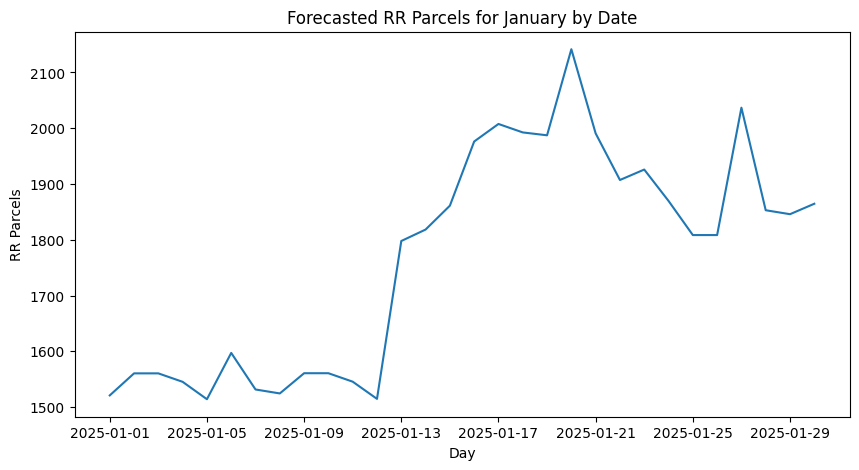

In [ ]:
ff.plot(figsize=(10, 5))
plt.title('Forecasted RR Parcels for January by Date')

plt.xlabel('Day')
plt.ylabel('RR Parcels')
plt.show()

In [ ]:
ff = ff.reset_index()

In [ ]:
# Getting forecast of total RR parcels in next 30 days (January)
jan_rr = int(ff['pred'].sum()) # Forecasted total number of RR parcels, rounded up to the nearest integer
print(f'The model predicts that there will be a total of {jan_rr} parcels returned/refunded between Jan 1 to Jan 30 2025.')

The model predicts that there will be a total of 53028 parcels returned/refunded between Jan 1 to Jan 30 2025.


In [ ]:
ff.sort_values(by=['pred']).head(1)
ff.sort_values(by=['pred']).tail(1)

,date,pred
19,2025-01-20,2141.603516


In [ ]:
# Multiplying each station's estimated proportion for next 30 days by the forecasted total number of RR parcels
proportions.head()
final_predictions = proportions[['station_id','proportion_jan']].copy()

# Predict number of RR parcels per station in the next 30 days
final_predictions['forecasted_rr'] = final_predictions['proportion_jan'] * jan_rr
final_predictions['forecasted_rr'] = final_predictions['forecasted_rr'].astype(int)

# Showing final predictions per station
final_predictions

,station_id,proportion_jan,forecasted_rr
0,7,0.061499,3261
1,9,0.035786,1897
2,11,0.030043,1593
3,13,0.037672,1997
4,18,0.039240,2080
5,19,0.035080,1860
6,20,0.040593,2152
7,273,0.030051,1593
8,434,0.054877,2910
9,903,0.044303,2349
